In [1]:
import numpy
import scipy
import sklearn
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [1]:
import json
# import csv
import unicodecsv as csv

with open('Input.json') as data_file:
    data = json.loads(data_file.read())

In [2]:
data

{'InputPath': ['C:/Development/TradingSystemDev/FolderWithInputFiles'],
 'TradeSplitterFiles': ['Trades_Calculation_0m-3m',
  'Trades_Calculation_0m-6m',
  'Trades_Calculation_0m-12m'],
 'OutputPath': 'C:/Development/TradingSystemDev/FolderWithOutputFiles/',
 'DataFrameFilters': [{'EntrySeconds': 'Maximum', 'Maximum': '420'},
  {'PositionType': 'Equals', 'Equals': 'Short'},
  {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'},
  {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}],
 'DependentVariable_Classification': 'WinTrade',
 'DependentVariable_Regression': 'PercentageProfit',
 'IndependentVariables': 'EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat',
 'OptimizationParameter': 'Sum(NetProfit)'}

In [2]:
data = pd.read_csv('Trades_Calculation_0m-3m.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.head(6))

  Symbol PositionType  Size  EntryDate  ExitDate     EntryTime      ExitTime  \
0   EBAY         Long  1000   20190301  20190301  09:30:09.163  09:30:28.597   
1   FNKO        Short -1000   20190301  20190301  09:30:32.123  09:32:31.350   
2   EBAY        Short -1000   20190301  20190301  09:31:14.277  09:32:59.311   
3   EBAY        Short -1000   20190301  20190301  09:31:22.502  09:32:59.311   
4   EBAY        Short -1000   20190301  20190301  09:30:30.164  09:32:59.311   
5    GPS         Long  1000   20190301  20190301  09:31:48.204  09:33:40.203   

          TradeTime  EntryPrice  ExitPrice  ...    GP  IH_PH  IL_PL  \
0  00:00:19.4337180       38.52     38.484  ...  GpUp     IH     PL   
1  00:01:59.2271070       23.22     23.052  ...  GpUp     PH     IL   
2  00:01:45.0339850       38.35     38.596  ...  GpUp     IH     PL   
3  00:01:36.8088880       38.33     38.686  ...  GpUp     IH     PL   
4  00:02:29.1470660       38.37     38.604  ...  GpUp     IH     PL   
5  00:01:51.9

In [4]:
#Available data

for i in range(len(data.columns)):
    print(data.columns[i])

Symbol
PositionType
Size
EntryDate
ExitDate
EntryTime
ExitTime
TradeTime
EntryPrice
ExitPrice
NetProfit
PercentageProfit
WinTrade
LossTrade
EntrySignal
ExitSignal
EntryCost
ExitCost
MFEPrice
MAEPrice
MFE
MAE
MfeMaeRatio
MFEPercentage
MAEPercentage
MFEFirst
MAEFirst
MFETime
MAETime
IntradayDrawDown
IntradayDrawDownTime
PeakNetProfit
PeakNetProfitTime
StrategyID
DayOfWeek
DayOfMonth
EntryNumber
Vol1MinRatioMaxPD123
Vol1MinRatioMaxPD123_TotalVolume
Vol1MinRatioMaxPD123_Volume
Vol1MinRatioMaxPD123_Time
Vol1Min
PreMarketVolume
AllExchangesVolume
Float
PreMarketCurrentGap
PreMarketCurrentGapPerc
PreMarketOpenGapPerc
PreMarketMaxGapUpPerc
PreMarketMaxGapDnPerc
IntradayCurrentMarketGapPerc
CurrentGapPercToPreMarketMaxGapUpPercRatio
CurrentGapPercToPreMarketMaxGapDnPercRatio
IntradayMarketGapPerc
IntradayMarketMaxGapUpPerc
IntradayMarketMaxGapDnPerc
Current_Vol_1Min_PD_Av_1_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_2_

In [5]:
def equals(d,keys,values):
    return d[d[keys]==values]

In [6]:
d1=equals(data,'PositionType','Short')

In [7]:
def between(d,key,v1,v2):
    return d.query("'"+str(v1)<=key<=str(v2)+"'")

In [8]:
"'"+str(5)<='key'<=str(2)+"'"

False

In [9]:
#d1=between(d1,'EntrySeconds',0,420)

In [10]:
d1=d1[d1.Float<= 500000000]

In [11]:
d1=d1.query('20<=EntryPrice<=180')

In [12]:
d1=d1.query('0<=EntrySeconds<=420')

In [13]:
d1.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
1,FNKO,Short,-1000,20190301,20190301,09:30:32.123,09:32:31.350,00:01:59.2271070,23.22,23.052,...,GpUp,PH,IL,-10.336283,2.619469,PHdmx,PLu10,84,81.6,-0.100553
11,GPS,Short,-1000,20190301,20190301,09:33:42.197,09:36:52.208,00:03:10.0103990,30.04,30.018,...,GpUp,PH,IL,-36.759907,3.986014,PHdmx,PLu10,11,79.0,0.039370
12,GPS,Short,-1000,20190301,20190301,09:33:42.197,09:36:52.208,00:03:10.0103990,30.04,30.018,...,GpUp,PH,IL,-36.759907,3.986014,PHdmx,PLu10,11,79.0,0.039370
13,NTNX,Short,-1000,20190301,20190301,09:36:23.128,09:38:04.213,00:01:41.0850080,34.41,34.362,...,GpDn,PH,IL,-146.404839,-69.495968,PHdmx,PLdmx,24,194.3,-0.079856
14,ZS,Short,-1000,20190301,20190301,09:32:25.182,09:38:14.822,00:05:49.6390400,56.80,56.356,...,GpUp,PH,IL,-8.929631,0.930170,PHd10,PLu10,222,34.4,0.020129


In [14]:
d1=d1.replace('∞%','0%')

In [15]:
d1.Fund52WeekChange.value_counts()

0%         270
145.06%     47
-38.48%     29
-24.44%     27
8.55%       24
-25.38%     23
52.18%      22
-56.98%     21
44.79%      21
-30.49%     20
11.14%      17
-62.23%     15
-36.97%     15
139.34%     14
-35.41%     14
92.12%      13
-28.09%     13
91.55%      13
-26.56%     12
-37.97%     12
-28.43%     12
-42.88%     12
21.59%      11
-38.43%     11
21.10%      11
-52.76%     11
-52.51%     10
-53.18%     10
52.19%      10
-57.89%     10
          ... 
28.56%       1
51.53%       1
25.86%       1
0.57%        1
3.28%        1
-1.32%       1
13.89%       1
12.29%       1
-44.81%      1
2.40%        1
11.02%       1
-3.45%       1
208.26%      1
-34.92%      1
-3.93%       1
-18.63%      1
14.48%       1
20.33%       1
9.49%        1
-8.69%       1
15.41%       1
24.83%       1
32.63%       1
24.24%       1
36.16%       1
-30.23%      1
19.38%       1
-38.29%      1
-12.70%      1
-44.03%      1
Name: Fund52WeekChange, Length: 277, dtype: int64

In [16]:
type(d1.Fund52WeekChange.iloc[2])

str

In [17]:
d1.shape

(1541, 188)

In [18]:
d1.corr()

,Size,EntryDate,ExitDate,EntryPrice,ExitPrice,NetProfit,PercentageProfit,WinTrade,LossTrade,EntryCost,...,Fund5YearAverageDividendYield,Column1,PR,PRFIL,EntrySeconds,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EntryDate,NaN,1.000000,1.000000,0.094594,0.095542,-0.023947,-0.016189,-0.025921,0.021658,-0.094594,...,0.089921,NaN,0.005880,0.005880,-0.054304,-0.007279,-0.049311,-0.023947,-0.001108,-0.000858
ExitDate,NaN,1.000000,1.000000,0.094594,0.095542,-0.023947,-0.016189,-0.025921,0.021658,-0.094594,...,0.089921,NaN,0.005880,0.005880,-0.054304,-0.007279,-0.049311,-0.023947,-0.001108,-0.000858
EntryPrice,NaN,0.094594,0.094594,1.000000,0.999282,0.030198,0.024133,-0.008280,0.008358,-1.000000,...,0.018040,NaN,0.695527,0.695527,0.030768,0.096174,-0.015772,0.030198,-0.065306,-0.019894
ExitPrice,NaN,0.095542,0.095542,0.999282,1.000000,-0.007698,-0.008367,-0.032092,0.032187,-0.999282,...,0.018325,NaN,0.696850,0.696850,0.029923,0.098997,-0.016885,-0.007698,-0.063760,-0.018124
NetProfit,NaN,-0.023947,-0.023947,0.030198,-0.007698,1.000000,0.857597,0.628036,-0.628486,-0.030198,...,-0.007319,NaN,-0.027080,-0.027080,0.022642,-0.073386,0.029173,1.000000,-0.041538,-0.046924
PercentageProfit,NaN,-0.016189,-0.016189,0.024133,-0.008367,0.857597,1.000000,0.658972,-0.659466,-0.024133,...,-0.012382,NaN,-0.013310,-0.013310,0.025998,-0.104842,0.035147,0.857597,-0.113162,-0.021874
WinTrade,NaN,-0.025921,-0.025921,-0.008280,-0.032092,0.628036,0.658972,1.000000,-0.995961,0.008280,...,0.021329,NaN,-0.048183,-0.048183,0.036445,-0.087039,0.020150,0.628036,-0.025185,-0.055184
LossTrade,NaN,0.021658,0.021658,0.008358,0.032187,-0.628486,-0.659466,-0.995961,1.000000,-0.008358,...,-0.019811,NaN,0.048995,0.048995,-0.036561,0.085981,-0.019431,-0.628486,0.025725,0.052791
EntryCost,NaN,-0.094594,-0.094594,-1.000000,-0.999282,-0.030198,-0.024133,0.008280,-0.008358,1.000000,...,-0.018040,NaN,-0.695527,-0.695527,-0.030768,-0.096174,0.015772,-0.030198,0.065306,0.019894


In [19]:
import seaborn as sns

In [20]:
d2=d1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat','WinTrade','PercentageProfit','NetProfit']]

In [21]:
X=d1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
Y=d1.WinTrade

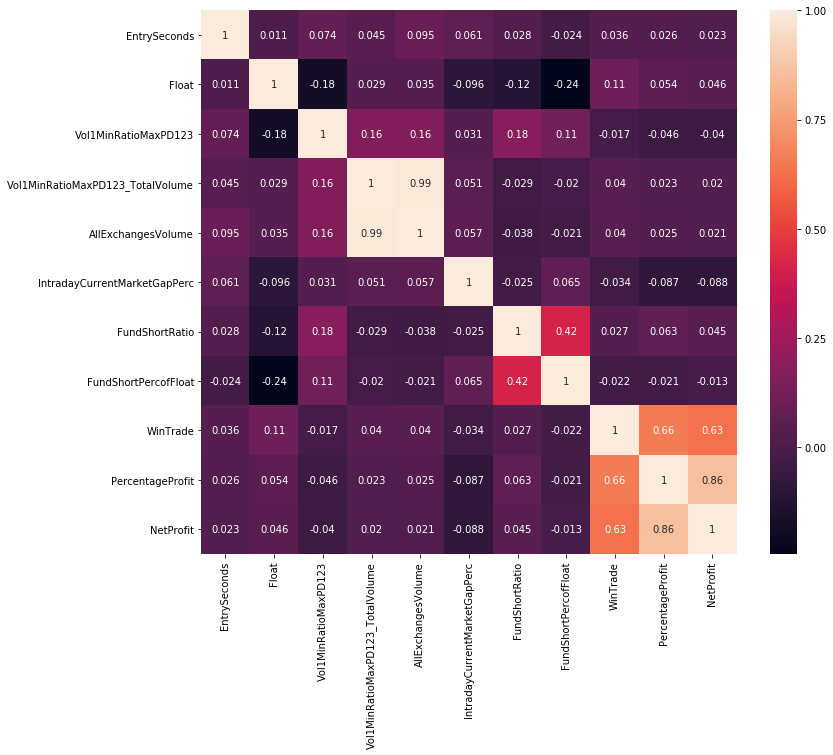

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(d2.corr(),annot=True)

In [23]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 1 to 15133
Data columns (total 12 columns):
EntrySeconds                        1541 non-null float64
Float                               1541 non-null int64
Vol1MinRatioMaxPD123                1541 non-null float64
Vol1MinRatioMaxPD123_TotalVolume    1541 non-null int64
AllExchangesVolume                  1541 non-null int64
IntradayCurrentMarketGapPerc        1541 non-null float64
Fund52WeekChange                    1541 non-null object
FundShortRatio                      1541 non-null float64
FundShortPercofFloat                1541 non-null float64
WinTrade                            1541 non-null int64
PercentageProfit                    1541 non-null float64
NetProfit                           1541 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 156.5+ KB


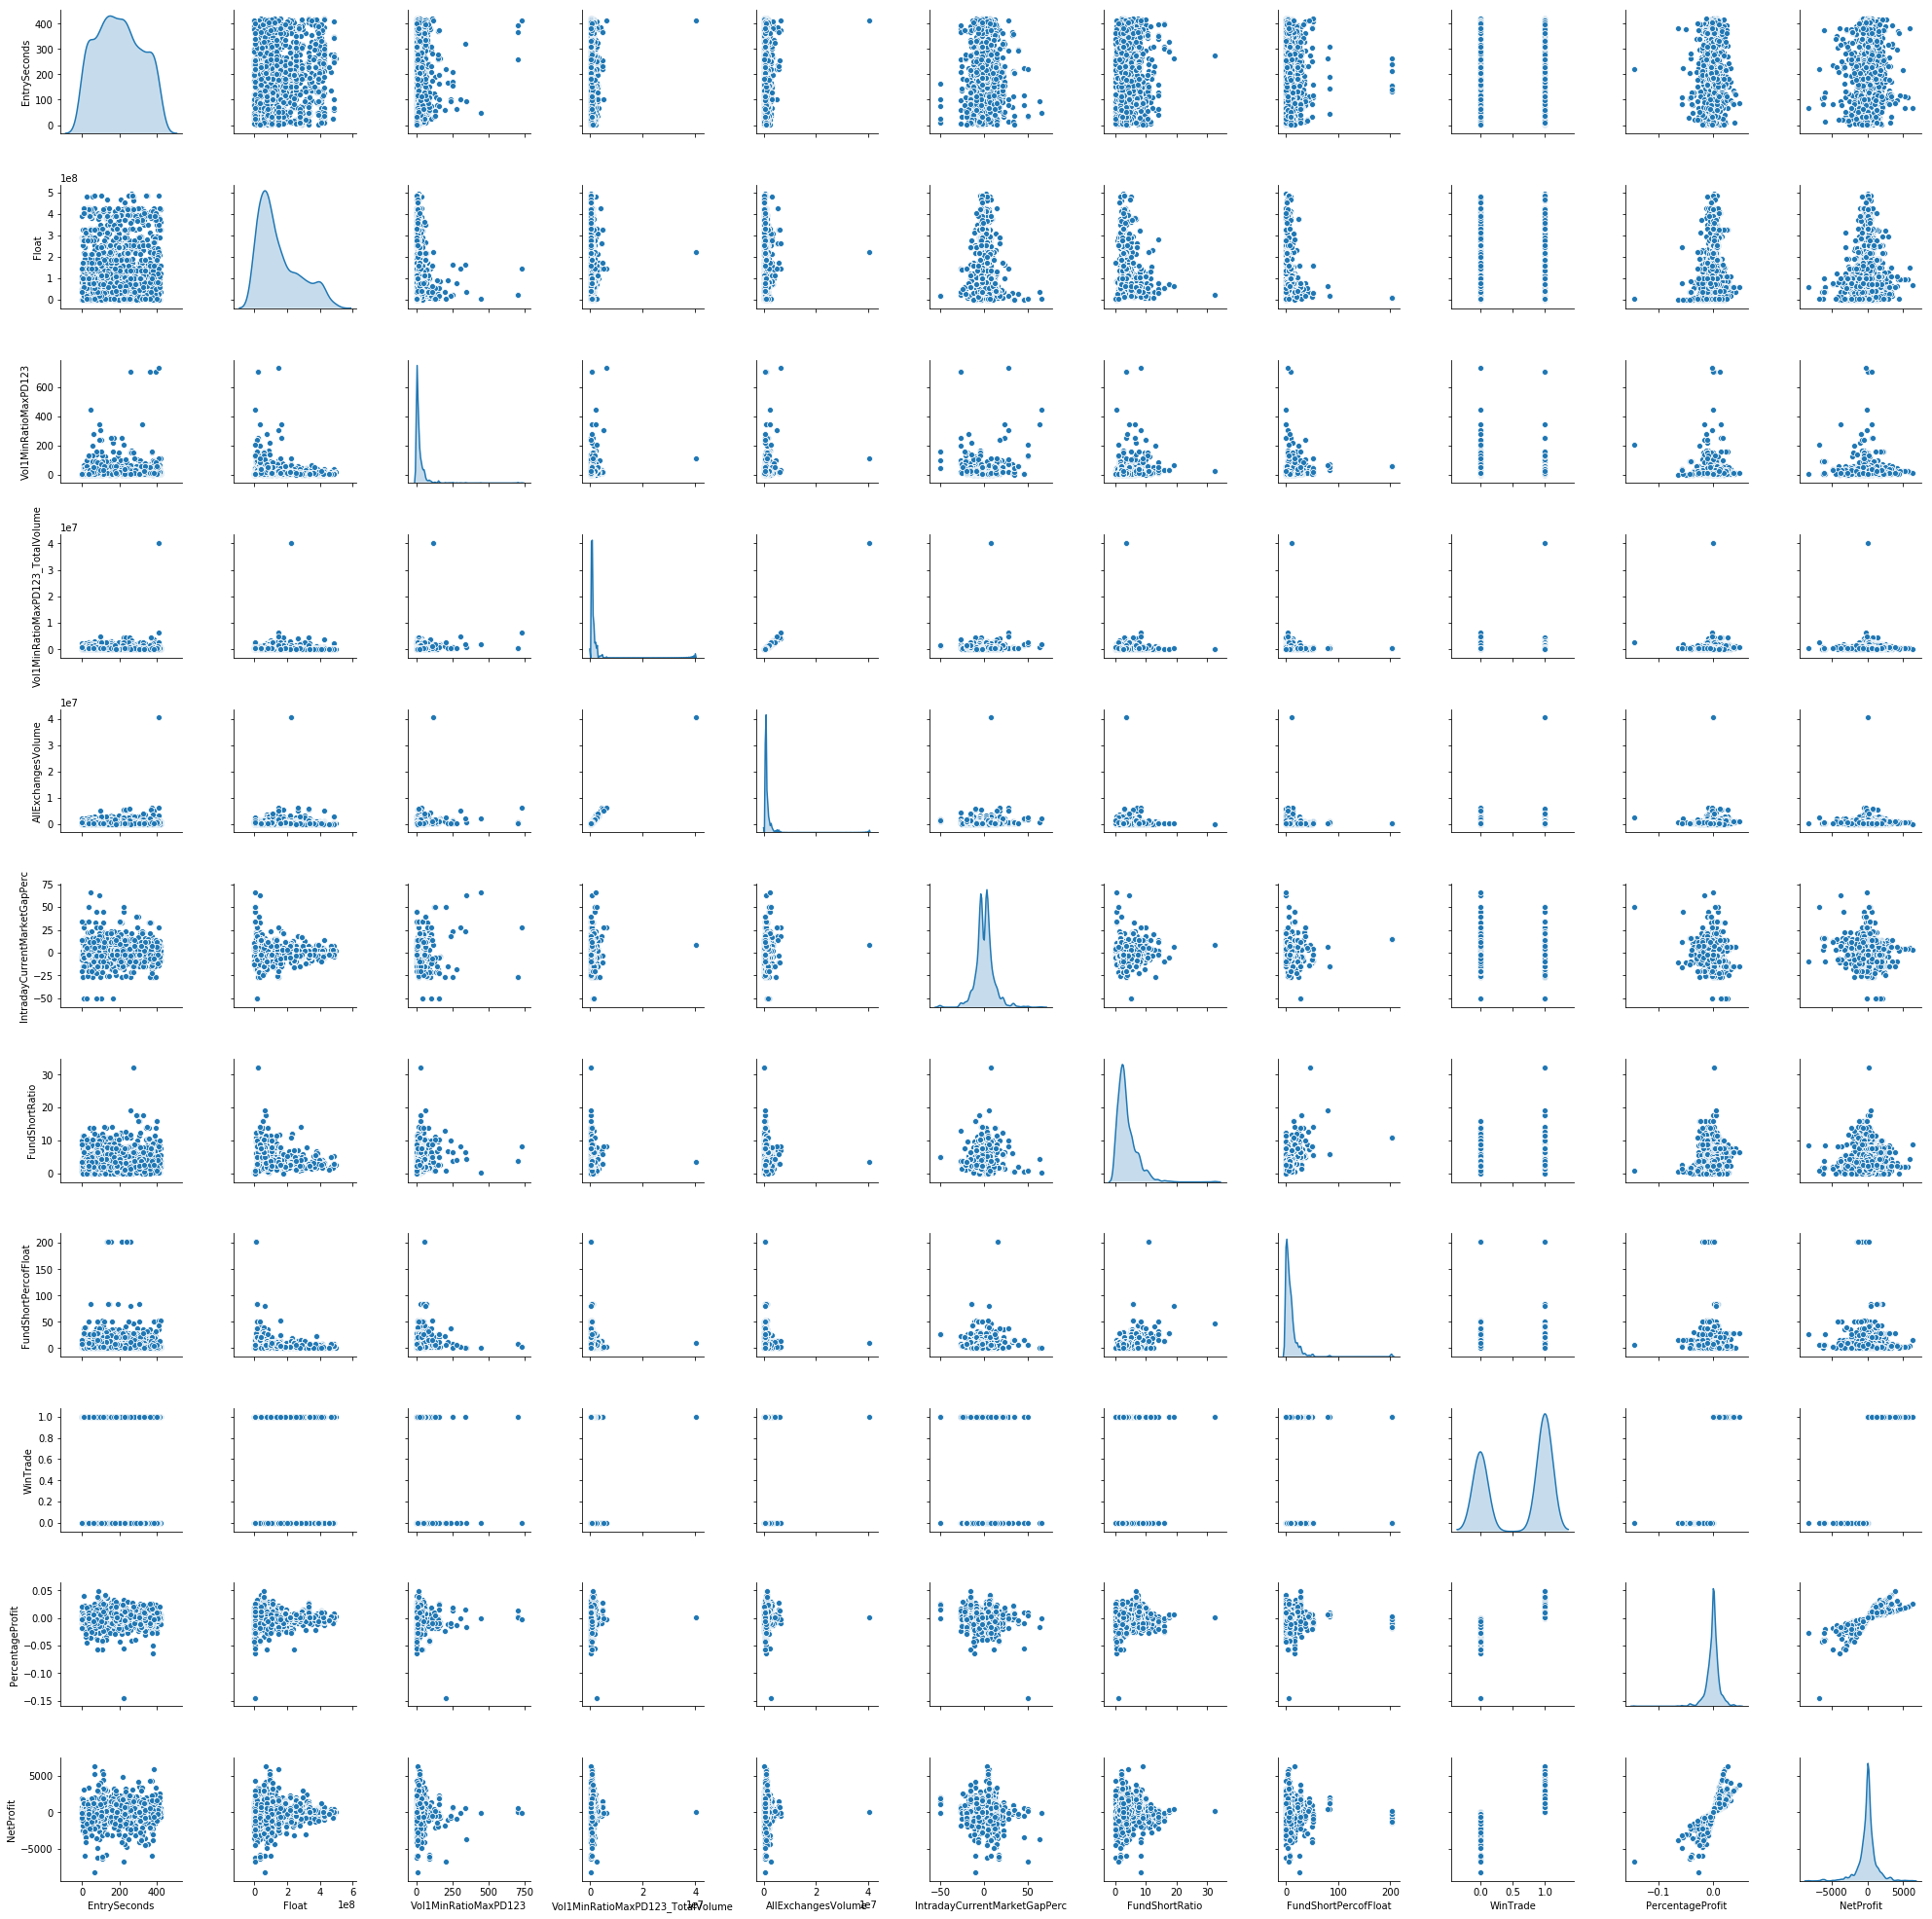

In [24]:
sns.pairplot(d2,diag_kind='kde')

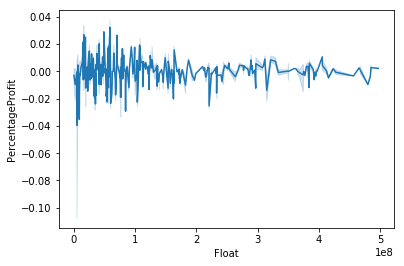

In [25]:
sns.lineplot(d2.Float,d2['PercentageProfit'])

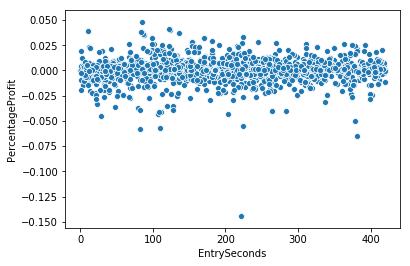

In [26]:
sns.scatterplot(d2['EntrySeconds'],d2['PercentageProfit'])

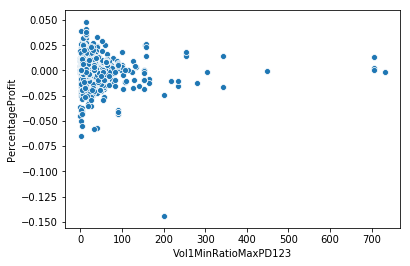

In [27]:
sns.scatterplot(d2['Vol1MinRatioMaxPD123'],d2['PercentageProfit'])

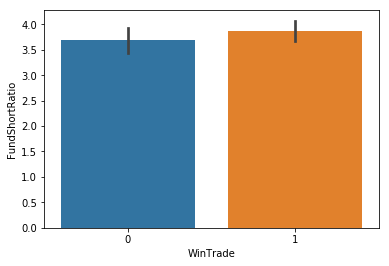

In [28]:
sns.barplot(d2.WinTrade,d2.FundShortRatio)

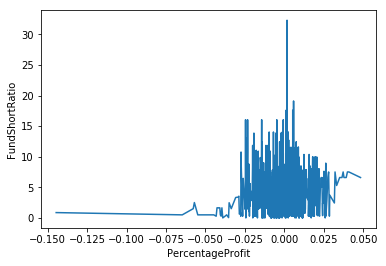

In [29]:
sns.lineplot(d2.PercentageProfit,d2.FundShortRatio)

In [30]:
round(X.shape[0]*0.6)

925

In [31]:
len(d2.Fund52WeekChange)

1541

d=[]
for i in range(len(d2.Fund52WeekChange)):
    f=pd.to_numeric(re.sub('[%]', '', d2.Fund52WeekChange.iloc[i]))
    d.append(f)


In [32]:
 d2.Fund52WeekChange=pd.to_numeric(d2.Fund52WeekChange.str.replace('%',''))/100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
d2.Fund52WeekChange

1        0.0000
11      -0.2983
12      -0.2983
13      -0.3697
14       1.7094
15       1.7094
16       0.1317
17      -0.2983
18      -0.2983
19      -0.2983
20       0.0000
21      -0.2533
24       0.0000
25       0.0000
35       0.2262
42       1.7094
46      -0.7143
53      -0.7143
54      -0.7143
63      -0.3697
64      -0.3697
66       1.7094
84       1.7094
98      -0.3697
99      -0.3697
105      0.3913
106      0.3913
118      0.0718
119      0.0718
121      0.0718
          ...  
14847   -0.3697
14848   -0.3697
14849   -0.0766
14853   -0.1761
14854   -0.1761
14855    0.0855
14856    0.0855
14857    0.0855
14859    0.8767
14867    0.0000
14872   -0.3697
14874   -0.3697
14878    0.0000
14902    0.8767
14903    0.8767
14906    0.0000
14907   -0.1532
14908    1.3934
14909    1.3934
14910    0.8767
14917   -0.1532
14922    1.3934
14947    0.0855
14948    0.0855
14970   -0.3629
14973   -0.3629
14975   -0.3629
14977   -0.3629
15006   -0.0766
15133    0.4822
Name: Fund52WeekChange, 

In [34]:
X.Fund52WeekChange=d2.Fund52WeekChange

In [35]:
#d2.Fund52WeekChange=pd.Series(d)/100

In [36]:
#pd.to_numeric(re.sub('[%]', '', d2.Fund52WeekChange.iloc[0]))

In [37]:
d2.Fund52WeekChange.isnull().sum()

0

In [38]:
#len(s)

In [39]:
#s=d2.Fund52WeekChange.dropna()

In [40]:
#X.Fund52WeekChange=d2.Fund52WeekChange

In [41]:
#d2.shape

In [42]:
x_train=X.head(round(X.shape[0]*0.6))
y_train=Y.head(round(Y.shape[0]*0.6))
x_test=X.tail(round(X.shape[0]*0.4))
y_test=Y.tail(round(Y.shape[0]*0.4))

# Random Forest

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [45]:
RF.feature_importances_

array([0.14986709, 0.10701924, 0.14422894, 0.1074959 , 0.13574286,
       0.10552325, 0.07710206, 0.08802616, 0.0849945 ])

Text(0.5, 0, 'Relative Importance')

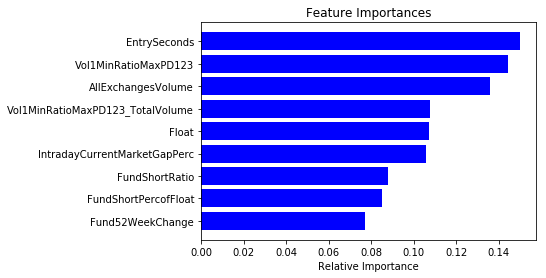

In [46]:
features=X.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Top 3 Facotrs are 1)EntrySeconds 2)VolMinRatioMaxPD123 3)AllExchangesVolume

In [47]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       266
           1       0.60      0.63      0.61       350

   micro avg       0.55      0.55      0.55       616
   macro avg       0.54      0.54      0.54       616
weighted avg       0.55      0.55      0.55       616



In [49]:
print(accuracy_score(y_test,y_pred))

0.5535714285714286


In [50]:
print(f1_score(y_test,y_pred))

0.6143057503506312


# PCA

In [128]:
from sklearn.decomposition import PCA
pca_d2 = PCA(n_components=3)
principalComponents_d2 = pca_d2.fit_transform(x_train)

In [129]:
principal_d2 = pd.DataFrame(data = principalComponents_d2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [130]:
principal_d2.tail()

,principal component 1,principal component 2,principal component 3
920,-0.849991,-1.641587,-0.695893
921,-0.627605,-0.342335,-0.492930
922,-0.514552,-1.030462,-1.301381
923,1.033414,0.231249,-0.378249
924,0.837813,0.086503,-0.190916


In [131]:
print('Explained variation per principal component: {}'.format(pca_d2.explained_variance_ratio_))

Explained variation per principal component: [0.2340391  0.17818469 0.13516428]


From the above output, you can observe that the principal component 1 holds 23.2% of the information while the principal component 2 holds 18% while principal component 3 holds 13.5%  the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 44% information was lost.

# Decision Tree

In [56]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [58]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5357142857142857


# Logistic Regreesion

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.02      0.04       266
           1       0.57      0.99      0.73       350

   micro avg       0.57      0.57      0.57       616
   macro avg       0.62      0.51      0.38       616
weighted avg       0.61      0.57      0.43       616

[[  6 260]
 [  3 347]]
0.573051948051948


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
y_pred = classifier.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[119 147]
 [137 213]]
              precision    recall  f1-score   support

           0       0.46      0.45      0.46       266
           1       0.59      0.61      0.60       350

   micro avg       0.54      0.54      0.54       616
   macro avg       0.53      0.53      0.53       616
weighted avg       0.54      0.54      0.54       616



In [65]:
accuracy_score(y_test, y_pred)

0.538961038961039

#  From the above alogorithms Logistic Regression is best suitable algorithm for this dataset.

# Supervised Linear Regression

In [66]:
import statsmodels.api   as sm
import scipy.stats       as stats
import matplotlib.pyplot as plt

In [67]:
# defining feature matrix(X) and response vector(y) 
X = d2[['Vol1MinRatioMaxPD123','EntrySeconds','AllExchangesVolume']] 
y = d2.PercentageProfit

X = sm.add_constant(X) # Add an intercept to our model
print(X)

       const  Vol1MinRatioMaxPD123  EntrySeconds  AllExchangesVolume
1        1.0                  60.7        32.123              387548
11       1.0                  31.8       222.197             5058957
12       1.0                  31.8       222.197             5058957
13       1.0                  98.2       383.128             4400367
14       1.0                  21.9       145.182              785554
15       1.0                  21.9       143.402              779765
16       1.0                   5.6       179.885              146832
17       1.0                  31.8       236.278             5222536
18       1.0                  31.8       235.503             5220291
19       1.0                  31.8       373.238             6198290
20       1.0                  93.9       308.695              734491
21       1.0                   8.2       187.172              221430
24       1.0                  72.4        43.387              410099
25       1.0                  72.4

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PercentageProfit   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.005
Date:                Sun, 27 Oct 2019   Prob (F-statistic):              0.111
Time:                        08:24:46   Log-Likelihood:                 4674.0
No. Observations:                1541   AIC:                            -9340.
Df Residuals:                    1537   BIC:                            -9319.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0004      0.001     -0.585      0.559      -0.002       0.001
Vol1MinRatioMaxPD123 -1.245e-05   6.11e-06     -2.038      0.042   -2.44e-05   -4.65e-07
EntrySeconds          2.665e-06   2.54e-06      1.050      0.294   -2.31e-06    7.64e-06
AllExchangesVolume     2.88e-10   2.38e-10      1.209      0.227   -1.79e-10    7.55e-10
==============================================================================
Omnibus:                      776.250   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21216.620
Skew:                          -1.781   Prob(JB):                         0.00
Kurtosis:                      20.825   Cond. No.                     2.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Optimization

In [69]:
df=d2[["EntrySeconds","AllExchangesVolume","NetProfit"]]

In [70]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit
1,32.123,387548,168
11,222.197,5058957,22
12,222.197,5058957,22
13,383.128,4400367,48
14,145.182,785554,444


In [71]:
df.tail()

,EntrySeconds,AllExchangesVolume,NetProfit
14973,227.482,310579,668
14975,181.161,186427,1158
14977,227.482,310579,668
15006,61.722,405460,-610
15133,331.623,231168,1270


In [72]:
# Python Program to Convert seconds 
# into hours, minutes and seconds 
  
def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d" % (hour, minutes) 

In [73]:
#for loop
A=[]
for i in df.EntrySeconds:
    A.append(convert(i))

In [74]:
A

['0:00',
 '0:03',
 '0:03',
 '0:06',
 '0:02',
 '0:02',
 '0:02',
 '0:03',
 '0:03',
 '0:06',
 '0:05',
 '0:03',
 '0:00',
 '0:00',
 '0:04',
 '0:00',
 '0:01',
 '0:05',
 '0:06',
 '0:00',
 '0:00',
 '0:04',
 '0:05',
 '0:01',
 '0:06',
 '0:03',
 '0:03',
 '0:03',
 '0:06',
 '0:00',
 '0:00',
 '0:05',
 '0:01',
 '0:01',
 '0:02',
 '0:01',
 '0:03',
 '0:06',
 '0:06',
 '0:03',
 '0:06',
 '0:03',
 '0:03',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:06',
 '0:02',
 '0:02',
 '0:03',
 '0:02',
 '0:03',
 '0:04',
 '0:04',
 '0:01',
 '0:01',
 '0:00',
 '0:01',
 '0:06',
 '0:02',
 '0:00',
 '0:00',
 '0:00',
 '0:06',
 '0:06',
 '0:00',
 '0:06',
 '0:01',
 '0:05',
 '0:00',
 '0:00',
 '0:02',
 '0:06',
 '0:06',
 '0:04',
 '0:00',
 '0:03',
 '0:06',
 '0:02',
 '0:06',
 '0:00',
 '0:00',
 '0:02',
 '0:00',
 '0:02',
 '0:00',
 '0:01',
 '0:02',
 '0:02',
 '0:00',
 '0:00',
 '0:01',
 '0:05',
 '0:00',
 '0:06',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:01',
 '0:06',
 '0:06',
 '0:01',
 '0:00',
 '0:00',
 

In [75]:
df["new"]=pd.Series(A)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit,new
1,32.123,387548,168,0:03
11,222.197,5058957,22,0:03
12,222.197,5058957,22,0:00
13,383.128,4400367,48,0:00
14,145.182,785554,444,0:04


In [77]:
df2=df.NetProfit.groupby(df.new).sum()

In [78]:
df2

new
0:00     2416
0:01     1030
0:02    -6210
0:03    10364
0:04     8832
0:05    -7266
0:06    15384
Name: NetProfit, dtype: int64

In [79]:
df4=df2[df2==max(df2)]
df4

new
0:06    15384
Name: NetProfit, dtype: int64

In [80]:
df4=df2[df2==min(df2)]
df4

new
0:05   -7266
Name: NetProfit, dtype: int64

In [81]:
z=df4.index[0]

In [82]:
final=df[df["new"]==z]

In [83]:
final.to_csv("Trades_Calculation_0m-3m_Results.csv")

In [84]:
final

,EntrySeconds,AllExchangesVolume,NetProfit,new
17,236.278,5222536,-288,0:05
193,124.546,209030,34,0:05
659,131.800,212621,-630,0:05
722,98.409,1098608,102,0:05
808,153.255,1339824,2230,0:05
1039,68.720,470936,-648,0:05
1099,211.699,444078,-700,0:05
1106,155.300,398435,-184,0:05
1270,28.262,343748,-2998,0:05
1271,28.262,343748,-2998,0:05


# Visualizing and Animating Optimization Algorithms with Matplotlib

In [85]:
%matplotlib inline

In [86]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions.

The Wikipedia article on Test functions for optimization has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at Beale's function:

f(x,y)=(1.5−x+xy)2+(2.25−x+xy2)2+(2.625−x+xy3)2

In [87]:
x=final["EntrySeconds"]
y=final["NetProfit"]

In [88]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [89]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [90]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [91]:
z = f(x, y)

We know the global minima is at  (3,0.5)

In [92]:
minima = np.array([3., .5])

In [93]:
f(*minima)

0.0

In [94]:
minima_ = minima.reshape(-1, 1)
minima

array([3. , 0.5])

In [95]:
f(*minima_)

array([0.])

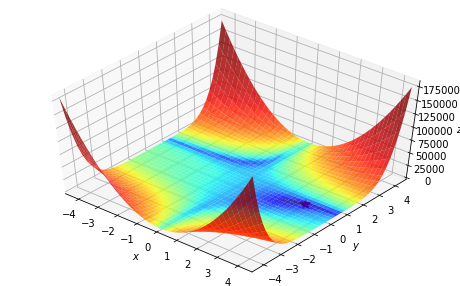

In [96]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

2D Contour Plot and Gradient Vector Field¶
We use autograd to compute the gradient vector field, and plot it with Matplotlib's quiver method.

In [97]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

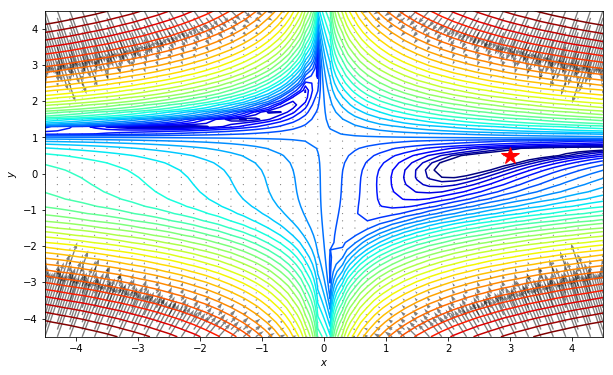

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Gradient-based Optimization
For the purposes of this demonstration, we use SciPy's optimization methods. It goes without saying that the code and patterns for producing these visualizations generalizes easily to other optimization tools and libraries.

We set the starting point as  (3,4) , since it is challenging for algorithms with a little too much momentum in the gradient descent update rule, as they may overshoot and end up in some local minima.

In [99]:
x0 = np.array([3., 4.])

Again, we use autograd to compute the gradients, and augment the function slightly to adhere to Scipy's optimization interface

In [100]:
func = value_and_grad(lambda args: f(*args))

The method we use first is Newton-CG, and set the callback simply as print. Note that we can only do this in Python 3, where print is an actual function.

In [101]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [102]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

The results look plausibly good, but would be more convincing with some visualization. Let us define a new callback function that appends the intermediate values to a list instead of simply printing it.

In [103]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [104]:
path_ = [x0]

In [105]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

In [106]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

In [107]:
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

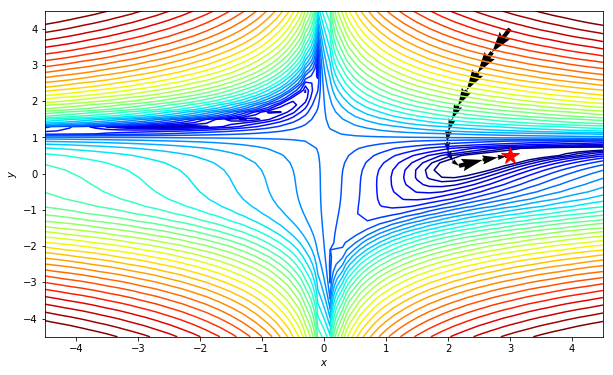

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

(-4.5, 4.5)

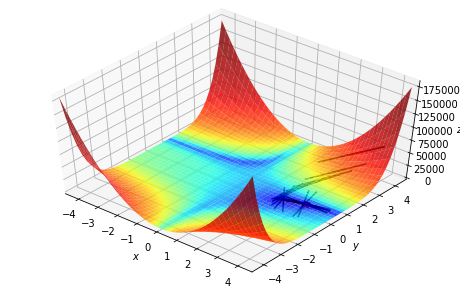

In [109]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

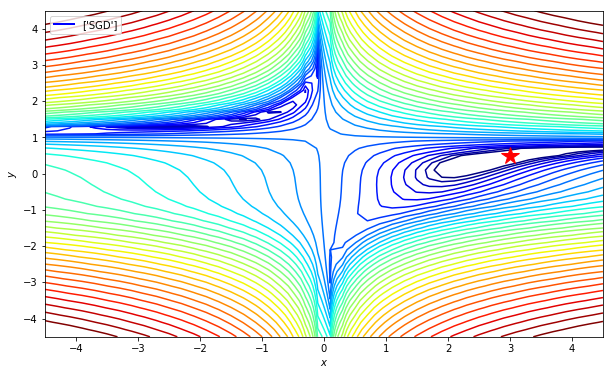

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label=['SGD'], lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [113]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [114]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

We define the total number of frames to be the total number of steps taken in the optimization and using blitting so as to only redraw the parts of the animation that have changed.

In [115]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)


Modularizing and Generalizing to Animate Multiple Paths Simultaneously
Instead of initializing the line and point in the global scope, and defining the animation callback functions to use those global variables, we can encapsulate everything in a closure.

Or better yet, we could just create subclass of FuncAnimation that is initialized with a variable number of paths to plot. In the initialization method, we just create and save the list of Line2D objects as attributes, and define animation callback methods that use these attributes.

In [118]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [119]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [120]:
methods = [
    "SGD",
    "Momentum",
    "NAG",
    "Adagrad",
    "Adadelta",
    "Rmsprop"
]

In [121]:
minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

In [122]:
paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

In [125]:
paths = [np.array(paths_[method]).T for method in methods]

In [126]:
zpaths = [f(*path) for path in paths]

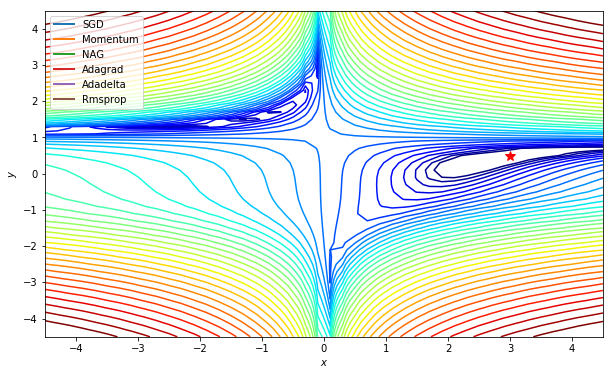

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')